# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url="https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
data_rows=soup.find_all('tr',class_='data-row')
print(data_rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list


weather_list=[]
# Loop through the scraped data to create a list of rows
for row in data_rows:
    contents = row.find_all('td')
    # Extract the text  within table data
    data = [content.text for content in contents]
    # Append the text to the list
    weather_list.append(data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns=['id','terrestrial_date','sol','ls','month','min_temp','pressure']
weather_df=pd.DataFrame(weather_list, columns=columns)

In [10]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
weather_df['id']=weather_df['id'].astype(int)
weather_df['terrestrial_date']=pd.to_datetime(weather_df['terrestrial_date'])
weather_df['sol']=weather_df['sol'].astype(int)
weather_df['ls']=weather_df['ls'].astype(int)
weather_df['month']=weather_df['month'].astype(int)
weather_df['min_temp']=weather_df['min_temp'].astype(float)
weather_df['pressure']=weather_df['pressure'].astype(float)

In [15]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
months = weather_df['month'].nunique()
print(f"There are", months, "months on the red planet of Mars. ")

There are 12 months on the red planet of Mars. 


In [17]:
# 2. How many Martian days' worth of data are there?
sol = weather_df['sol'].nunique()
sol

1867

In [19]:
# 3. What is the average low temperature by month?
month = weather_df.groupby('month')
avg_minTemp = month['min_temp'].mean()
print(avg_minTemp )

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [22]:
# Convert into pandas dataframe
avg_minTemp_df = pd.DataFrame(avg_minTemp)
avg_minTemp_df.head()

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725


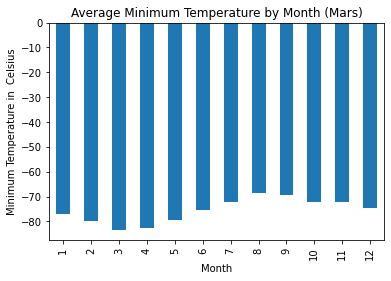

In [24]:
# Plot the average temperature by month
avg_minTemp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Minimum Temperature in  Celsius')

# Add title and save
plt.title('Average Minimum Temperature by Month (Mars)')
plt.savefig('avg_minTemp_byMonth.png')
plt.show()

In [27]:
# Identify the coldest and hottest months in Curiosity's location
coldest_temp= avg_minTemp_df['min_temp'].min()
coldest_temp

-83.30729166666667

In [28]:
hottest_temp= avg_minTemp_df['min_temp'].max()
hottest_temp

-68.38297872340425

In [31]:
coldest_month =  avg_minTemp_df.loc[ avg_minTemp_df['min_temp']==coldest_temp]
hottest_month =  avg_minTemp_df.loc[ avg_minTemp_df['min_temp']==hottest_temp]

print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)

Coldest month:         min_temp
month           
3     -83.307292
Hottest month:         min_temp
month           
8     -68.382979


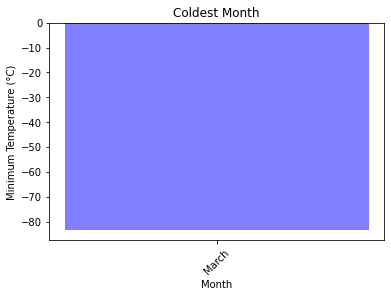

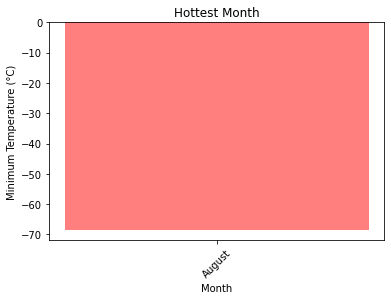

In [32]:
coldest_month = avg_minTemp_df.loc[avg_minTemp_df['min_temp'] == coldest_temp]
hottest_month = avg_minTemp_df.loc[avg_minTemp_df['min_temp'] == hottest_temp]

month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
x = [month_names[i-1] for i in coldest_month.index]
y = coldest_month['min_temp']

plt.bar(x, y, color='blue', alpha=0.5)
plt.title("Coldest Month")
plt.xlabel("Month")
plt.ylabel("Minimum Temperature (°C)")
plt.xticks(rotation=45)
plt.show()

x = [month_names[i-1] for i in hottest_month.index]
y = hottest_month['min_temp']

plt.bar(x, y, color='red', alpha=0.5)
plt.title("Hottest Month")
plt.xlabel("Month")
plt.ylabel("Minimum Temperature (°C)")
plt.xticks(rotation=45)
plt.show()

In [34]:
# 4. Average pressure by Martian month
avg_pressure_martinMonth = month['pressure'].mean()

print(avg_pressure_martinMonth)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


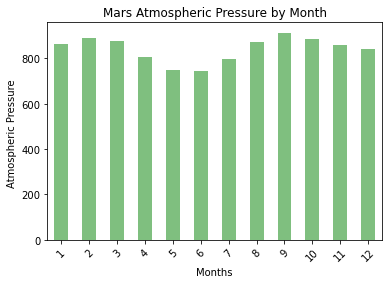

In [39]:
# Plot the average pressure by month
avg_pressure_martinMonth.plot(kind='bar', color='green', alpha=0.5)

# Add a title for the chart
plt.title("Mars Atmospheric Pressure by Month")

# Label the x-axis with "Months"
plt.xlabel("Months")

# Label the y-axis with "Atmospheric Pressure"
plt.ylabel("Atmospheric Pressure ")

# Rotate the x-axis labels by 45 degrees to improve readability
plt.xticks(rotation=45)

# Save the chart as a PNG image
plt.savefig('pressure_byMonth_mars.png')

# Display the chart
plt.show()

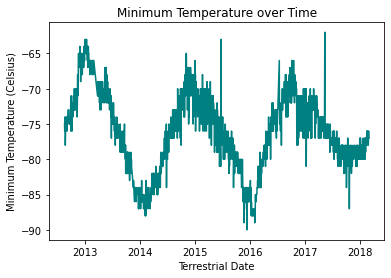

In [47]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Write the data to a CSV
plt.plot(weather_df['terrestrial_date'], weather_df['min_temp'],  color='teal')

# Label the x-axis with "Terrestrial Date"
plt.xlabel("Terrestrial Date")

# Label the y-axis with "Minimum Temperature (Celsius)"
plt.ylabel("Minimum Temperature (Celsius)")

# Add a title to the plot
plt.title("Minimum Temperature over Time")

# Save the plot as a PNG image with the file name "mintemp_mars.png"
plt.savefig("mintemp_mars.png")

# Show the plot
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [48]:
weather_df.to_csv('marsweather.csv', index=False)

In [49]:
browser.quit()